# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [173]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [174]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
#help from AskBCS Learning​ to change data type
ride_data_df['date']= pd.to_datetime(ride_data_df['date'])
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12


In [175]:
#Define the function "say_hello" so it prints "Hello!" when called.
def say_hello():
    print("Hello World!")
say_hello()


Hello World!


### Merge the DataFrames

In [176]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [177]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [178]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

## Deliverable 1: Get a Summary DataFrame 

In [179]:
#  1. Get the total rides for each city type
total_rides_by_type_df = pyber_data_df.groupby(["type"]).count()["driver_count"]
total_rides_by_type_df

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [180]:
# 2. Get the total drivers for each city type
total_driver_by_city_df = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_by_city_df

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [181]:
#  3. Get the total amount of fares for each city type
fare_by_city_type_df = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_by_city_type_df

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [182]:
#4. Get the average fare per ride for each city type. 
fareAvg_by_city_type_df = pd.Series(fare_by_city_type_df / total_rides_by_type_df)
fareAvg_by_city_type_df = fareAvg_by_city_type_df.rename("Average_city")
fareAvg_by_city_type_df

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average_city, dtype: float64

In [183]:
# 5. Get the average fare per driver for each city type. 
driver_avg_fare_city_df = pd.Series(fare_by_city_type_df / total_driver_by_city_df)
driver_avg_fare_city_df = driver_avg_fare_city_df.rename("Average_driver")
driver_avg_fare_city_df


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
Name: Average_driver, dtype: float64

In [184]:
#  6. Create a PyBer summary DataFrame. 
# Create a DataFrame
pyber_summary_df = pd.merge(total_rides_by_type_df,total_driver_by_city_df, on=['type'])
pyber_summary_df = pd.merge(pyber_summary_df,fare_by_city_type_df, on=['type'])
pyber_summary_df = pd.merge(pyber_summary_df,fareAvg_by_city_type_df, on=['type'])
pyber_summary_df = pd.merge(pyber_summary_df,driver_avg_fare_city_df, on=['type'])

pyber_summary_df

,driver_count_x,driver_count_y,fare,Average_city,Average_driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [185]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Rural to Urban
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   driver_count_x  3 non-null      int64  
 1   driver_count_y  3 non-null      int64  
 2   fare            3 non-null      float64
 3   Average_city    3 non-null      float64
 4   Average_driver  3 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 144.0+ bytes


In [186]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame([{
               "rides": total_rides_by_type_df,
    "drivers": total_driver_by_city_df,
    "fares":fare_by_city_type_df,
    "avg fare per ride": fareAvg_by_city_type_df,
    "avg fare per driver":driver_avg_fare_city_df }])
pyber_summary_df.head()

,rides,drivers,fares,avg fare per ride,avg fare per driver
0,type Rural 125 Suburban 625 Urban ...,type Rural 78 Suburban 490 Urban ...,type Rural 4327.93 Suburban 19356.33...,type Rural 34.623440 Suburban 30.9701...,type Rural 55.486282 Suburban 39.5027...


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [198]:
# 1. Read the merged DataFrame
#ride_data_df = pd.read_csv(ride_data_to_load)
#ride_data_df.head(10)
#pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
                                                               
# Display the DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [199]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# Combine the data into a single dataset
#pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
New_dataframe_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
# Display the data table for preview
New_dataframe_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33

In [200]:
#pyber_data_df = pyber_data_df
#importing pandas package
#import pandas as pd
# making data frame from csv file
#data = pd.read_csv("employees.csv")
# setting first name as index column
#data.set_index(["First Name"], inplace = True,append = True, drop = True)
# resetting index
#data.reset_index(inplace = True)
# display
#data.head()
#https://www.geeksforgeeks.org/python-pandas-dataframe-reset_index/



In [201]:
# 3a. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()before reset
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [202]:
New_dataframe_df

fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:00  18.45
      2019-05-08 07:29:00  18.55
      2019-05-08 11:38:00  19.77
      2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [203]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()after reset
NewDataPivot = New_dataframe_df.reset_index()
NewDataPivot

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [204]:
#pyber_data_pivot = pyber_data_df.groupby(['city','date']).sum()[['fare']]
#pyber_data_pivot.tail(10)

In [205]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

#(piviot table with date as index) (columns = 'type'), (values = 'fare')
QfourPivot_df=NewDataPivot.pivot(index='date', columns='type', values ='fare')
QfourPivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [206]:
QfourPivot_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 13:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [209]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#(new data frame using loc.new data frame.df) 

#Q4_df.loc['2019-01-01':'2019-04-29']
#help from AskBCS Learning
QfiveNew_df = QfourPivot_df.loc['2019-01-01':'2019-04-29']
QfiveNew_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:00,NaN,NaN,28.41
2019-04-29 21:20:00,NaN,NaN,13.59
2019-04-29 22:08:00,NaN,25.75,NaN


In [211]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#Convert to date time
#DatetimeIndex: number of entries, 2019-01-01 to 2019-04-29
QfiveNew_df.index = pd.to_datetime(QfiveNew_df.index)
QfiveNew_df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [214]:
# 7. Check that the datatype for the index is datetime using df.info()
QfiveNew_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [215]:
# 8a. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#Google panada.DataFrame.resample
#Convenience method for frequency conversion and resampling of time series. 
#The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), 
#or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter.

#index = pd.date_range('2019-01-01', periods=9, freq='W')
#series = pd.Series(range(9), index=index)
#series


In [216]:
# 1. resample only works when you have a datetime index
# 2. resample works similarly to groupby
# new_DataFrame.groupby('city').sum() # sum of fares for each city
# new_DataFrame.groupby('city')

In [220]:
QfiveNew_df.resample("W").sum()
George_df=QfiveNew_df.resample("W").sum()
George_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [ ]:
# method 1: pyplot
# from matplotlib import pyplot as plt
# plt.plot(...)
# plt.scatter(...)

# method 2: pandas = "object-oriented method"
# import pandas
# df.plot()
# plt.xlabels(...)

Text(60.68000000000001, 0.5, 'Fare ($USD)')

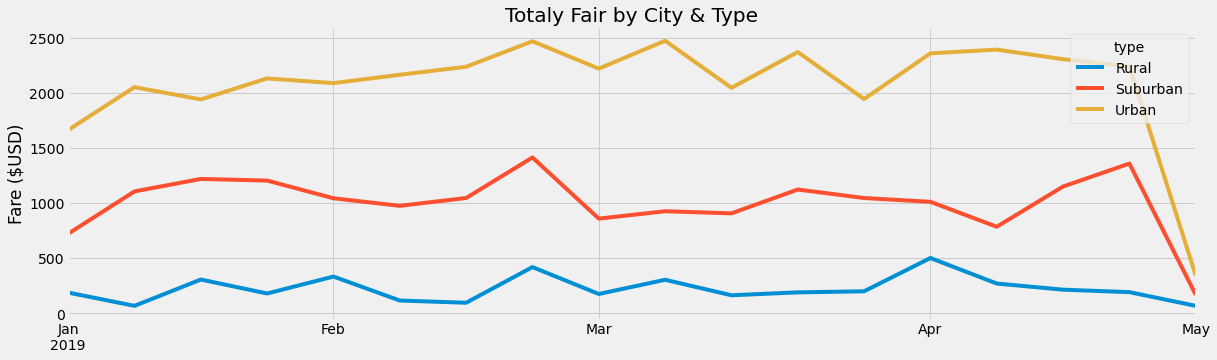

In [223]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
#fig,ax - plt.subplots(figsize = 1,18))
George_df.plot(figsize=(18,5),)
plt.title('Totaly Fair by City & Type')
plt.savefig('analysis/Pyber_fare_summary.png');
plt.xlabel('')
plt.ylabel('Fare ($USD)')
